<font size=7>Animate Seizure Event

<font color="green"> look for: start 25s range 9000 12000 5

# Setup

Here we check to see if there are any interesting patterns during the seizure event.

In [1]:
import pickle
from human_hip import spike_data
from matplotlib import pyplot as plt
from human_hip.raw_data import get_brain_waves
from human_hip.animate import animate_waves
from human_hip.spike_data import read_autocurated_data, plot_raster, read_phy_files


In [2]:
sd = spike_data.read_phy_files("/workspaces/human_hippocampus/data/ephys/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/elliott/elliott_chip21769_2.zip")


(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

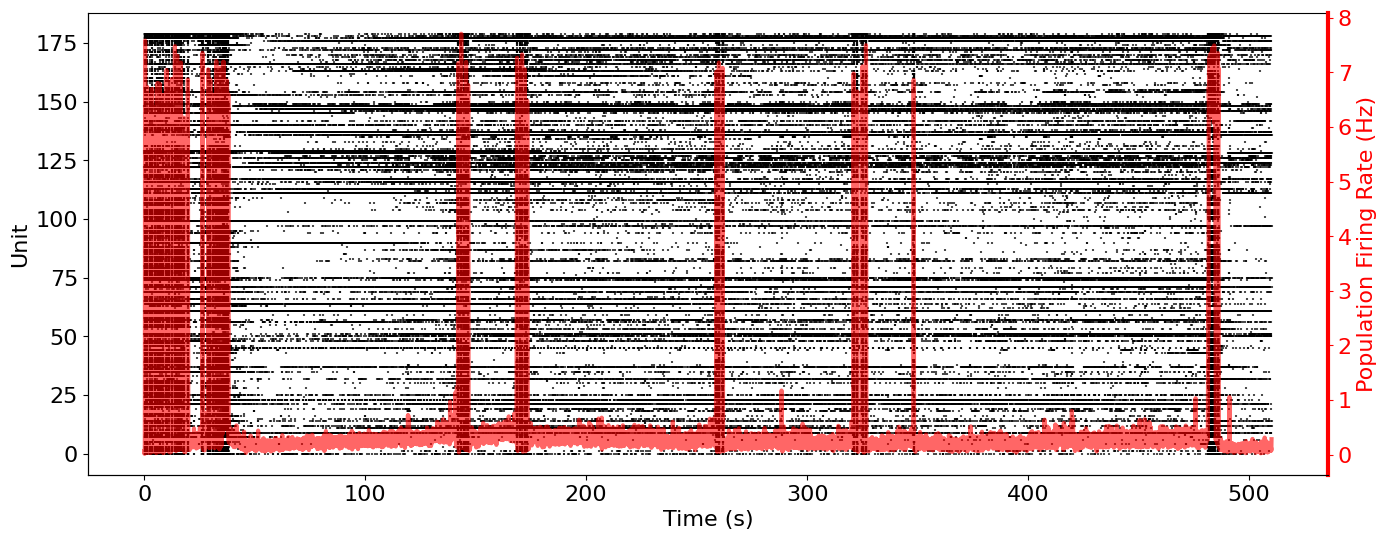

In [3]:
plot_raster( sd )

# <font color="green"> multiplot - 34-36 seconds

In [4]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/acid1_start25s_stop39s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate', 'uuid', 'file'])
(894, 14000)


In [5]:
from human_hip.raw_data import get_brain_waves
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import cm
from matplotlib.animation import FuncAnimation

import matplotlib.pyplot as plt
from braingeneers.analysis.analysis import SpikeData
from scipy.ndimage import gaussian_filter1d
import numpy as np

In [6]:
raw_dict = data_raw
wave_type="theta"
movie_range_ms=range(9000,11000,5)
filename='media/chip21769_acid1_fancy_theta_raster_start25s_range_9000_11000_5.mp4'
image_path = "/workspaces/human_hippocampus/data/histology/chip21769_bw.jpeg"

frame_interval_ms=100
size_exp=1.3
size_scale=30
start_s = 25

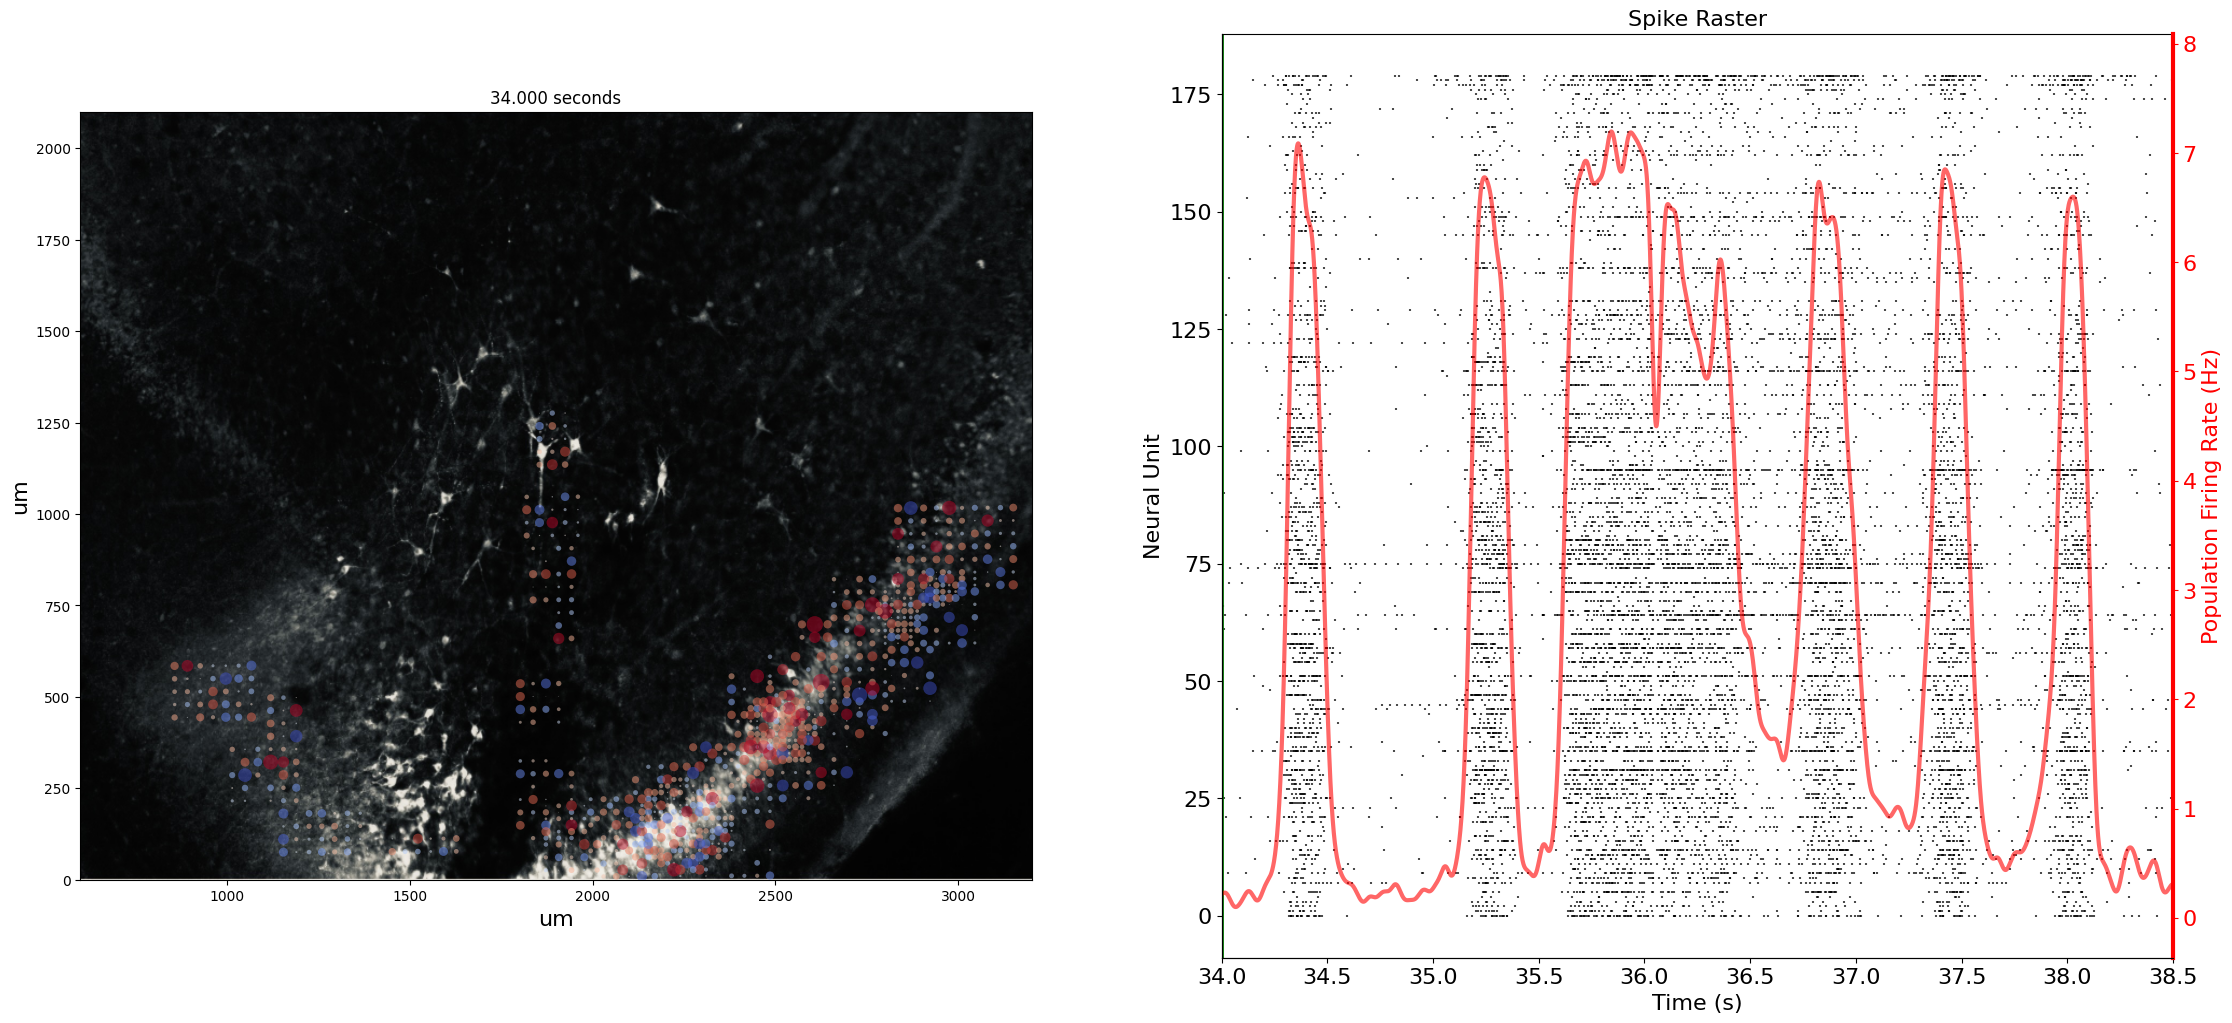

In [7]:
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

### Code for Theta Plot ###
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )[wave_type]  # get common brain waves
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
img = plt.imread(image_path)      # Load in image
plots[0].imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
#plot0 = plots[0].scatter( raw_dict['xy'][:,1], raw_dict['xy'][:,0]/12.5, c=data[:,0] , norm=norm, cmap=cm.coolwarm,
#                        s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.5 , edgecolor='none' )
plot0 = plots[0].scatter( raw_dict['xy'][:,1], raw_dict['xy'][:,0]/12.5, c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                        s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.5 , edgecolor='none' )
plots[0].set_xlim(600,3200)
plots[0].set_xlabel('um', fontsize=16)                                         # add axises and title
plots[0].set_ylabel('um', fontsize=16)

### Code for Raster ###
# Get firing rate
pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plots[1].set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    plots[1].scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
plots[1].set_xlabel("Time (s)", fontsize=16)
plots[1].set_ylabel("Neural Unit", fontsize=16)
plots[1].xaxis.set_tick_params(labelsize=16)
plots[1].yaxis.set_tick_params(labelsize=16)

axs1 = plots[1].twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.set_xlim((34, 38.5))
#axs1.set_ylim(ylim)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = plots[1].axvline(x=10, color='green', linewidth=2, linestyle='-')
 

# animation function.  This is called sequentially
def animate(i):
    # Wave plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**size_exp)*size_scale
    plots[0].set_title(f"{start_s+i/1000:.3f} seconds")
    # Raster Plot
    t = start_s + i/1000
    vl.set_xdata([t,t])
    return plots

anim = FuncAnimation(fig, animate, frames=movie_range_ms, interval=100, blit=False)  
#anim.save( filename )

# <font color="green"> multiplot 34-38.5 seconds

In [9]:
raw_dict = data_raw
wave_type="theta"
movie_range_ms=range(9000,13500,5)
filename='media/chip21769_acid1_fancy_theta_raster_start25s_range_9000_13500_5.mp4'
image_path = "/workspaces/human_hippocampus/data/histology/chip21769_bw.jpeg"

frame_interval_ms=100
size_exp=1.3
size_scale=30
start_s = 25

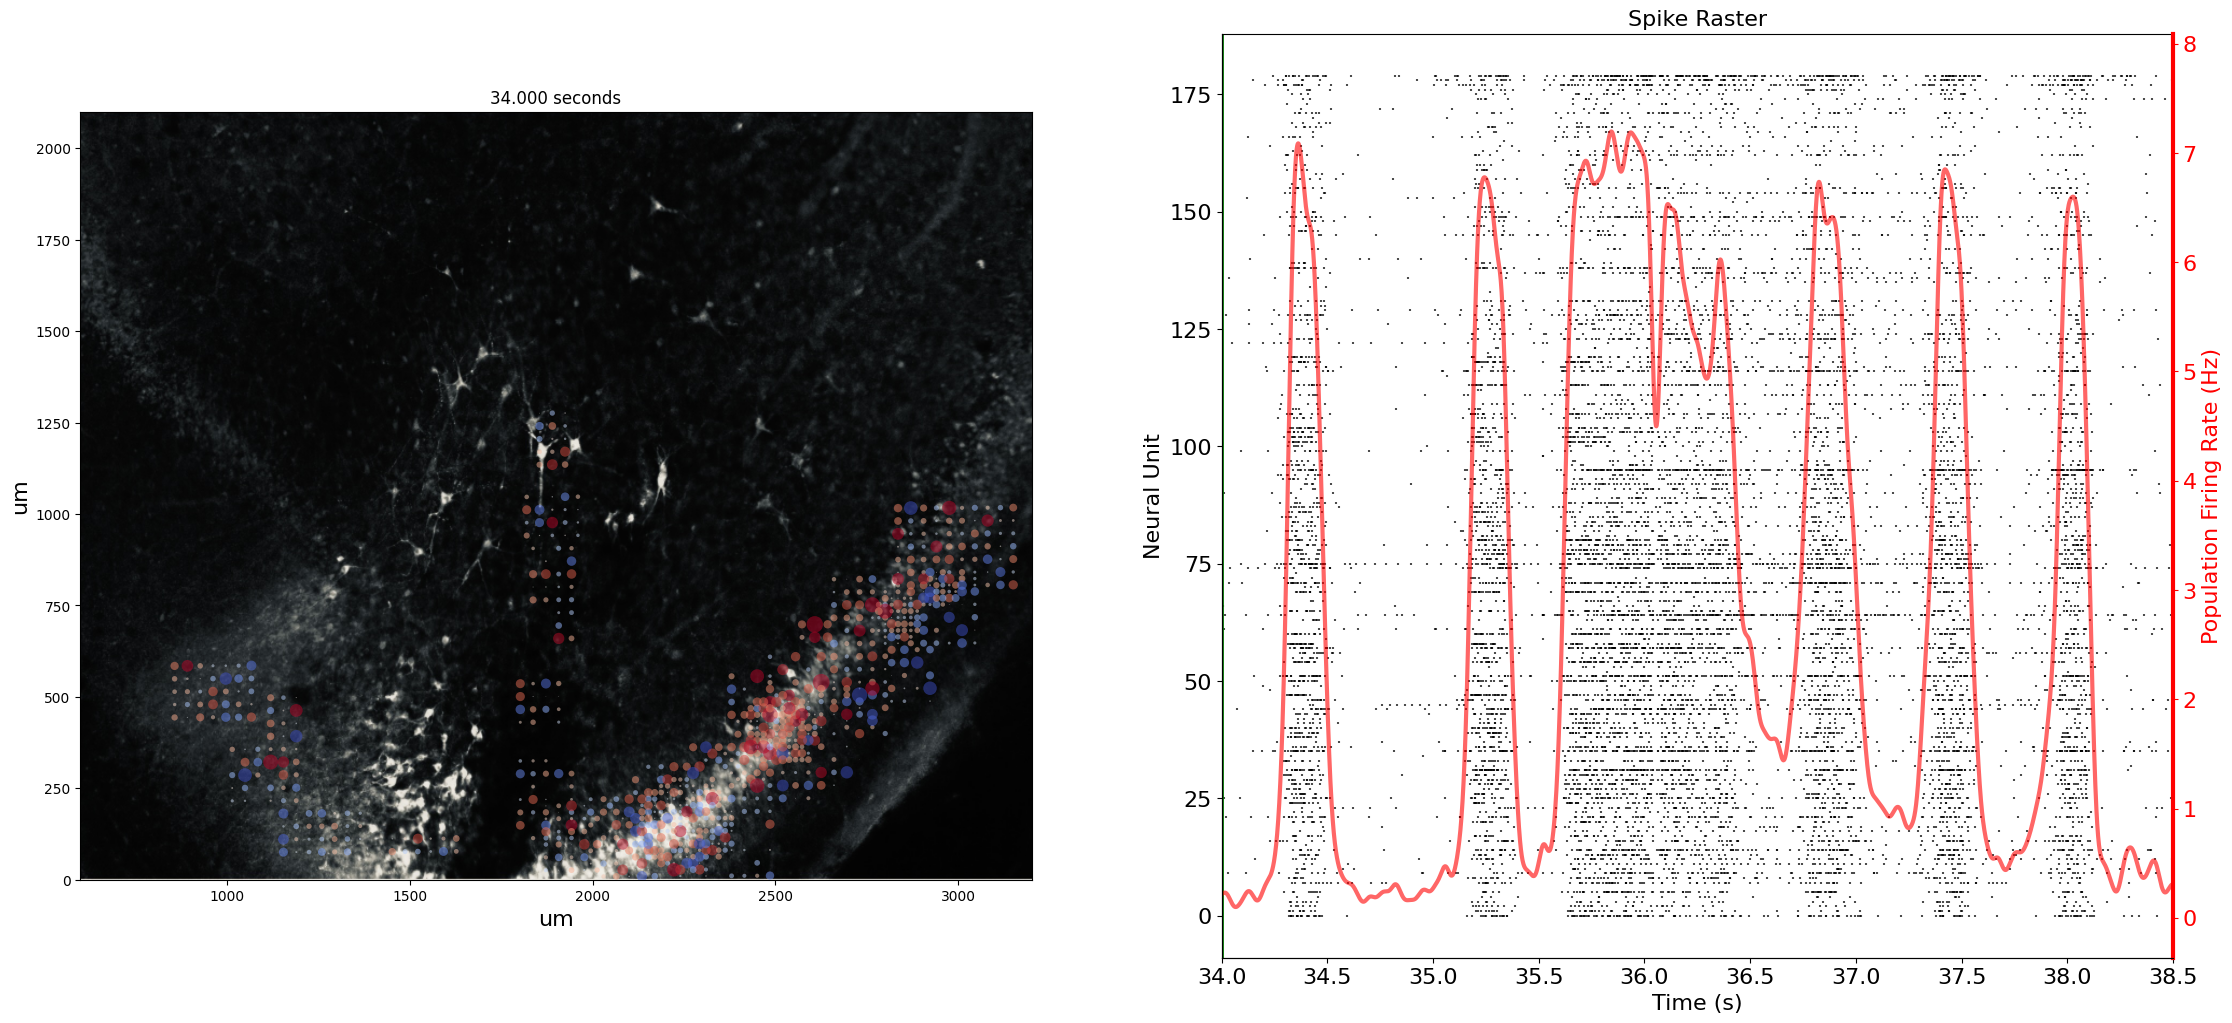

In [10]:
fig, plots = plt.subplots(nrows=1,ncols=2,figsize=(27,12))

### Code for Theta Plot ###
data = get_brain_waves( raw_dict["data"], raw_dict["frame_rate"] )[wave_type]  # get common brain waves
norm = plt.Normalize( vmin= np.mean(data)-np.std(data), vmax= np.mean(data)+np.std(data) )
img = plt.imread(image_path)      # Load in image
plots[0].imshow(img,  extent=[0, 3850, 0, 2100]) # Plot image, have it correspond to electrode dimensions
#plot0 = plots[0].scatter( raw_dict['xy'][:,1], raw_dict['xy'][:,0]/12.5, c=data[:,0] , norm=norm, cmap=cm.coolwarm,
#                        s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.5 , edgecolor='none' )
plot0 = plots[0].scatter( raw_dict['xy'][:,1], raw_dict['xy'][:,0]/12.5, c=data[:,0] , norm=norm, cmap=cm.coolwarm,
                        s=(np.abs(data[:,0])**size_exp)*size_scale ,  alpha=.5 , edgecolor='none' )
plots[0].set_xlim(600,3200)
plots[0].set_xlabel('um', fontsize=16)                                         # add axises and title
plots[0].set_ylabel('um', fontsize=16)

### Code for Raster ###
# Get firing rate
pop_rate = sd.binned(bin_size=1)
pop_fr = gaussian_filter1d(pop_rate.astype(float), sigma=20)
bins = np.linspace(0, sd.length, pop_rate.shape[0] ) #/1000
plots[1].set_title("Spike Raster", fontsize=16)

y = 0
for vv in sd.train:
    plots[1].scatter(vv/1000, [y]*len(vv), marker="|", c='k', s=4, alpha=0.7)
    y += 1
plots[1].set_xlabel("Time (s)", fontsize=16)
plots[1].set_ylabel("Neural Unit", fontsize=16)
plots[1].xaxis.set_tick_params(labelsize=16)
plots[1].yaxis.set_tick_params(labelsize=16)

axs1 = plots[1].twinx()
axs1.yaxis.set_label_position("right") 
axs1.spines['right'].set_color('r')
axs1.spines['right'].set_linewidth(3)
axs1.plot(bins/1000, pop_fr, color='r', linewidth=3, alpha=0.6)
axs1.set_ylabel("Population Firing Rate (Hz)", fontsize=16, color='r')
axs1.set_xlabel("Time (ms)", fontsize=16)
axs1.yaxis.set_tick_params(labelsize=16)
axs1.set_xlim((34, 38.5))
#axs1.set_ylim(ylim)
axs1.spines['top'].set_visible(False)
axs1.get_xaxis().set_visible(False)
axs1.tick_params(left=False, right=True, labelleft=False, labelright=True,
                bottom=False, labelbottom=True)
axs1.tick_params(axis='y', colors='r')
vl = plots[1].axvline(x=10, color='green', linewidth=2, linestyle='-')
 

# animation function.  This is called sequentially
def animate(i):
    # Wave plot
    plot0.set_array(data[:,i])
    plot0._sizes = (np.abs(data[:,i])**size_exp)*size_scale
    plots[0].set_title(f"{start_s+i/1000:.3f} seconds")
    # Raster Plot
    t = start_s + i/1000
    vl.set_xdata([t,t])
    return plots

anim = FuncAnimation(fig, animate, frames=movie_range_ms, interval=100, blit=False)  
anim.save( filename )

# <font color="brown"> Old 25-39 seconds

(<Axes: xlabel='Time (s)', ylabel='Unit'>,
 <Axes: xlabel='Time (ms)', ylabel='Population Firing Rate (Hz)'>)

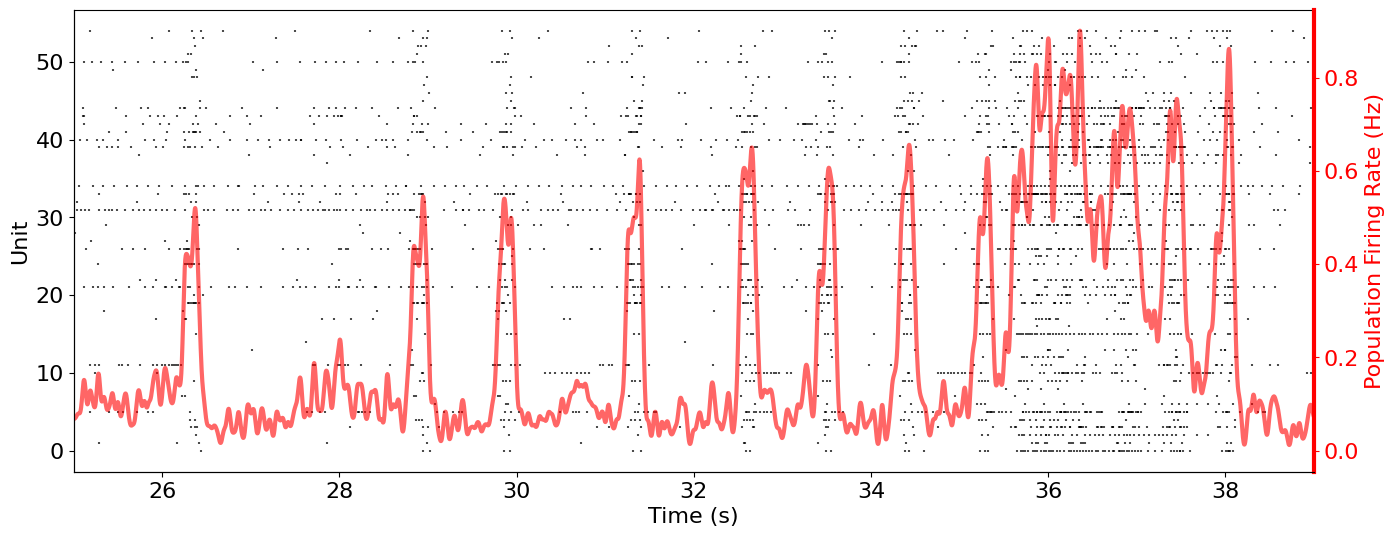

In [8]:
plot_raster( sd , xlim=(25, 39))

In [14]:
with open("/workspaces/human_hippocampus/data/ephys_raw/2023-12-11-e-Hc120523_aav9hckcr1_chip21769/acid1_start25s_stop39s_fs1ms.pkl", 'rb') as filename:
    data_raw = pickle.load(filename)
print(data_raw.keys())
print(data_raw["data"].shape)

dict_keys(['data', 'xy', 'frame_rate', 'uuid', 'file'])
(894, 14000)


Making animation of 1.0 minutes
Saved animation to media/chip21769_acid1_theta_start0s_range_9000_12000_5.mp4


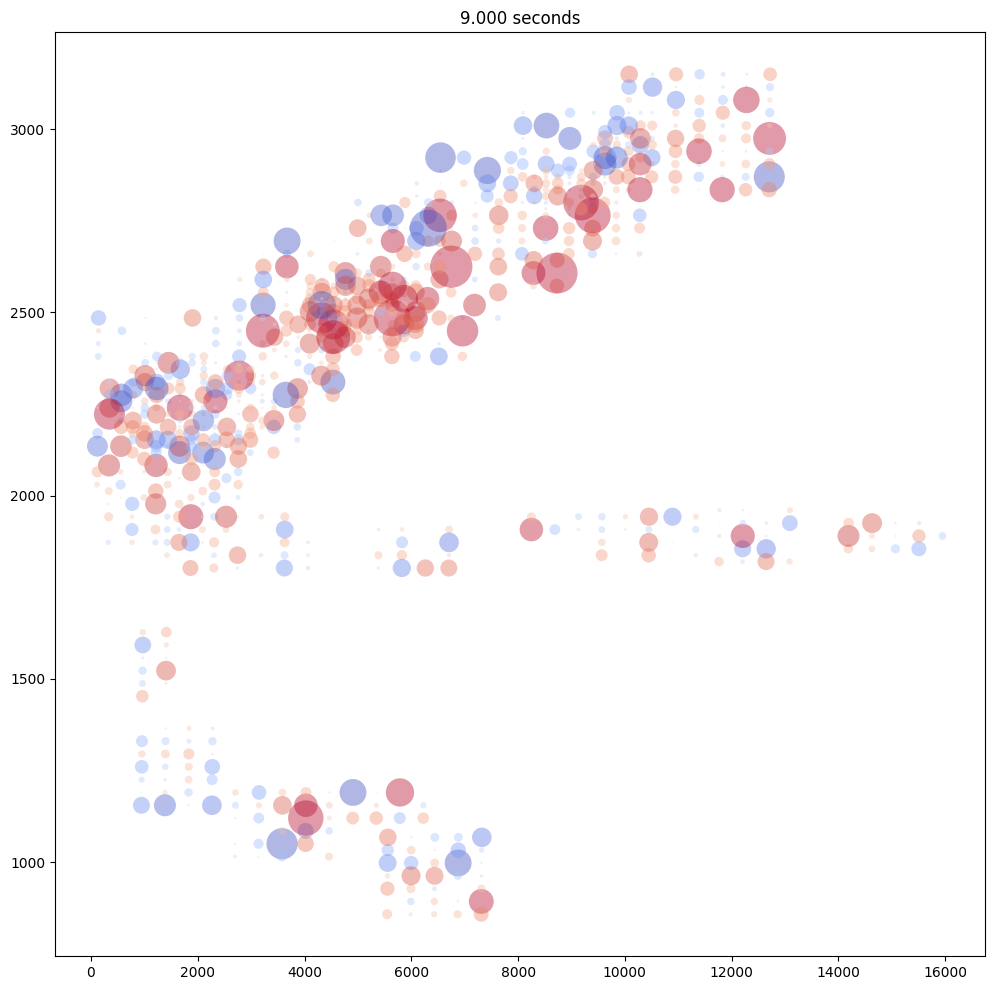

In [10]:
animate_waves(data_raw, wave_type="theta", movie_range_ms=range(9000,12000,5), filename='media/chip21769_acid1_theta_start0s_range_9000_12000_5.mp4' )

Making animation of 1.333 minutes
Saved animation to media/chip21769_acid1_theta_start25s_range_10000_14000_5.mp4


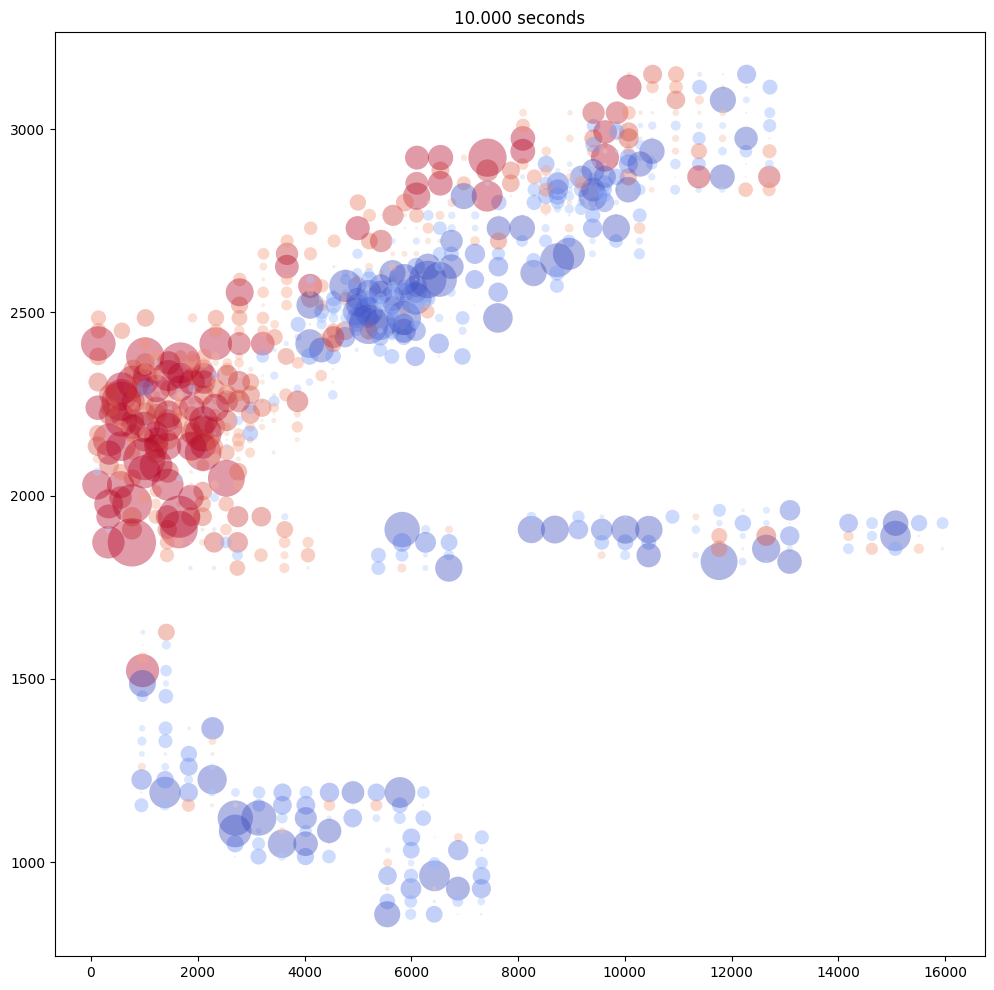

In [15]:
animate_waves(data_raw, wave_type="theta", movie_range_ms=range(10000,14000,5), filename='media/chip21769_acid1_theta_start25s_range_10000_14000_5.mp4' )